In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Data Import & Engineering

Abbreviations:

Cryptocurrency Adoption = C, Democracy = D, Education = E, Gini Index = G, Gross Domestic Product = GDP, 
Human Development Index = HDI, Corruption, Perception Index = CPI, Regulatory Quality = RQ, Control of Corruption = CC, Economic Freedom Index = EF, Network Readiness Index = N

In [221]:
df_country_all = pd.read_csv("../crypto_adoption_emerging_countries/input/All Country Data.csv", index_col="Country")
df_country_all

,C,D,E,G,GDP,HDI,CPI,RQ,CC,EF,N
Country,,,,,,,,,,,
Afghanistan,0.000,2.85,0.414,29.70,2542.853,0.51,16,10.10,6.73,51.50,41.77
Albania,0.010,5.89,0.746,33.20,14534.109,0.80,35,63.94,33.17,66.50,46.57
Algeria,0.000,4.01,0.672,27.60,11894.859,0.75,35,7.69,29.33,46.20,35.30
Angola,0.016,3.72,0.500,51.30,7346.304,0.58,26,16.35,13.94,50.60,29.77
Argentina,0.174,7.02,0.855,41.40,22997.000,0.85,45,33.65,53.37,52.20,51.27
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.799,2.88,0.700,52.15,7344.079,0.71,16,0.48,4.33,25.90,34.14
Vietnam,0.443,3.08,0.630,35.70,10535.168,0.70,37,41.83,34.13,55.30,49.57
Yemen,0.005,1.95,0.350,36.70,2056.586,0.47,15,4.33,1.92,60.85,12.33


In [216]:
#Load Financial Inclusion 2017 Data from World Bank and merge with other country data
df_fi_2017 = pd.read_csv("../crypto_adoption_emerging_countries/input/FI_Filtered_2017.csv", index_col="Country")
df_fi_2017 = df_fi_2017.fillna(0)
df_all_2017 = pd.merge(df_country_all, df_fi_2017, left_index=True, right_index=True)
df_all_2017

,C,D,E,G,GDP,HDI,CPI,RQ,CC,EF,N,AC,BFI,BMM,CredC,DebC,RDP,DEP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,2.85,0.414,29.7,2542.853,0.511,16,10.10,6.73,51.5,41.77,14.89,3.81,0,1.06,2.71,9.04,65.53
Albania,0.010,5.89,0.746,33.2,14534.109,0.795,35,63.94,33.17,66.5,46.57,40.02,12.52,0,8.02,26.89,22.25,56.00
Algeria,0.000,4.01,0.672,27.6,11894.859,0.748,35,7.69,29.33,46.2,35.30,42.78,4.95,0,3.24,19.97,17.31,54.35
Angola,0.016,3.72,0.500,51.3,7346.304,0.581,26,16.35,13.94,50.6,29.77,0.00,0.00,0,0.00,0.00,0.00,0.00
Argentina,0.174,7.02,0.855,41.4,22997.000,0.845,45,33.65,53.37,52.2,51.27,48.71,24.37,0,23.97,41.37,27.02,59.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,0.627,7.96,0.900,41.4,65253.518,0.926,69,88.94,84.62,76.8,80.32,93.12,68.36,0,65.60,80.23,64.98,93.42
Uzbekistan,0.013,2.01,0.729,29.7,7382.387,0.720,25,12.98,14.42,53.3,41.77,37.09,2.36,0,0.59,24.15,25.82,57.38
Vietnam,0.443,3.08,0.630,35.7,10535.168,0.704,37,41.83,34.13,55.3,49.57,30.80,21.72,0,4.12,26.74,14.92,64.01


# To-Do: Check why after merge 123 instead of 137 rows

In [233]:
df_fi_2021 = pd.read_csv("../crypto_adoption_emerging_countries/input/FI_Filtered_2021.csv", index_col="Country")
df_fi_2021= df_fi_2021.fillna(0)
df_all_2021 = pd.merge(df_country_all, df_fi_2021, left_index=True, right_index=True)
df_all_2021

,C,D,E,G,GDP,HDI,CPI,RQ,CC,EF,N,AC,BFI,BMM,CredC,DebC,RDP,DEP
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,2.85,0.414,29.7,2542.853,0.51,16,10.10,6.73,51.5,41.77,9.65,2.05,0.00,0.00,2.60,4.33,0.00
Albania,0.010,5.89,0.746,33.2,14534.109,0.80,35,63.94,33.17,66.5,46.57,0.00,10.74,33.07,26.98,9.47,2.77,4.62
Algeria,0.000,4.01,0.672,27.6,11894.859,0.75,35,7.69,29.33,46.2,35.30,15.72,0.00,31.91,10.68,38.77,2.77,0.00
Angola,0.016,3.72,0.500,51.3,7346.304,0.58,26,16.35,13.94,50.6,29.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.174,7.02,0.855,41.4,22997.000,0.85,45,33.65,53.37,52.2,51.27,0.00,4.96,0.00,8.56,19.23,13.37,85.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,0.627,7.96,0.900,41.4,65253.518,0.93,69,88.94,84.62,76.8,80.32,0.00,0.00,0.00,7.87,10.44,25.26,8.00
Uzbekistan,0.013,2.01,0.729,29.7,7382.387,0.72,25,12.98,14.42,53.3,41.77,3.46,0.00,69.58,57.71,6.52,0.00,51.66
Vietnam,0.443,3.08,0.630,35.7,10535.168,0.70,37,41.83,34.13,55.3,49.57,0.00,0.00,0.00,0.00,0.34,95.43,0.00


# 2. Correlation Matrix for 2017 and 2021 Financial Inclusion Data

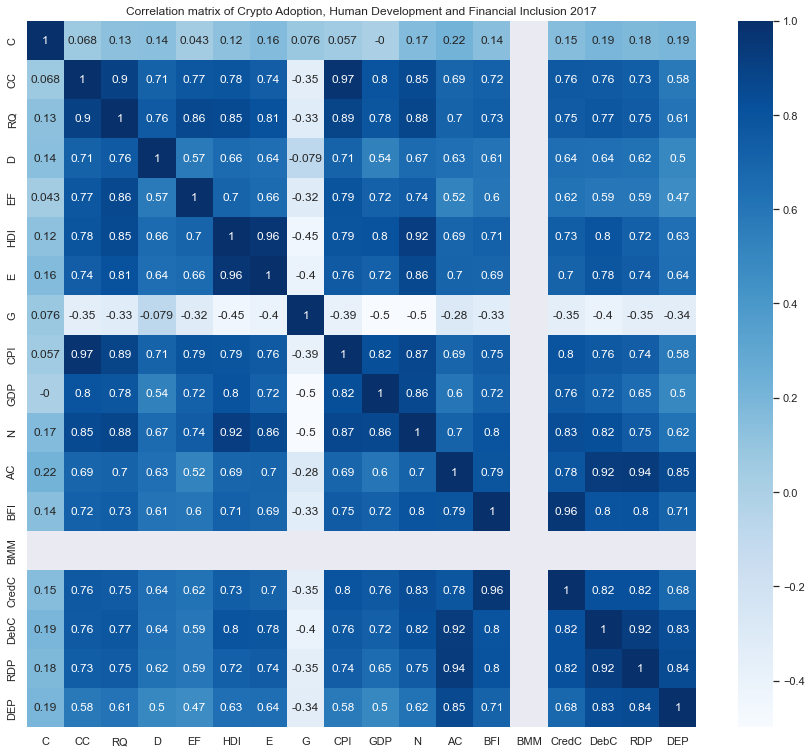

In [92]:
sns.set(rc={"figure.figsize":(15,13)})
hm_2017_corr = sns.heatmap(df_all_2017.corr().round(3), annot = True, cmap="Blues")
hm_2017_corr.set(title = "Correlation matrix of Crypto Adoption, Human Development and Financial Inclusion 2017")
#plt.show()
plt.savefig("../crypto_adoption_emerging_countries/output/Corr_Matrix_2017.jpg")

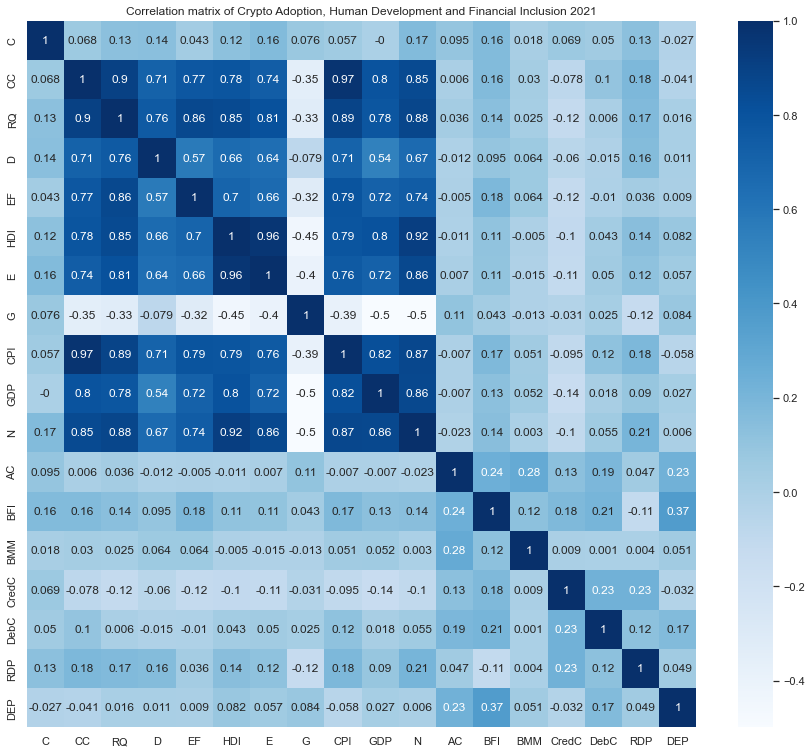

In [93]:
sns.set(rc={"figure.figsize":(15,13)})
hm_2021_corr = sns.heatmap(df_all_2021.corr().round(3), annot = True, cmap="Blues")
hm_2021_corr.set(title = "Correlation matrix of Crypto Adoption, Human Development and Financial Inclusion 2021")
plt.savefig("../crypto_adoption_emerging_countries/output/Corr_Matrix_2021.jpg")

# 3. Plotting Crypto Adoption with Financial Inclusion Indicators

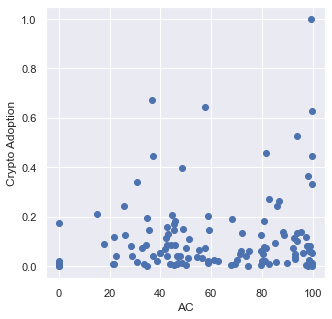

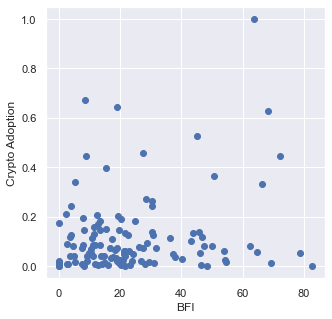

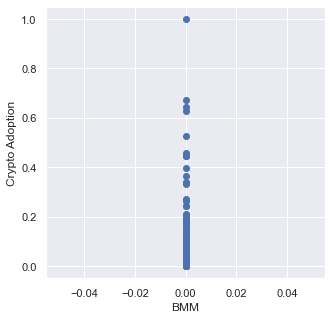

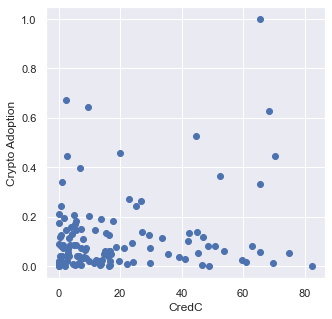

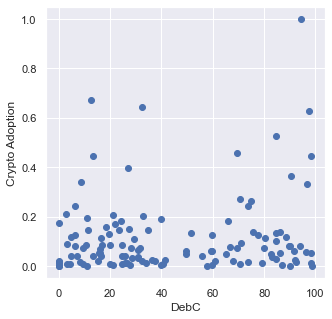

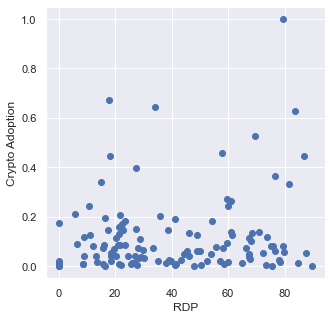

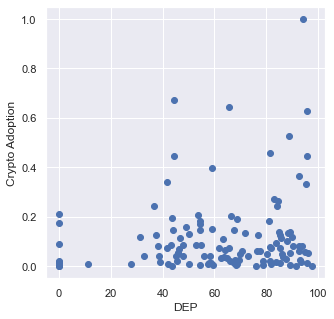

In [177]:
y=df_all_2017['C']

for n in range(11,18):
    x=df_all_2017.iloc[:,n].sort_values()
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(str(df_all_2017.columns[n]))
    plt.ylabel('Crypto Adoption')
    #plt.savefig("../crypto_adoption_emerging_countries/output/Plot_Crypto_" + str(df_all_2017.columns[n]) + "2017.jpg")
    plt.show()

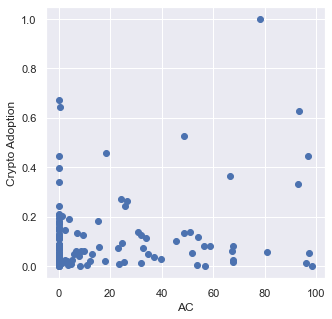

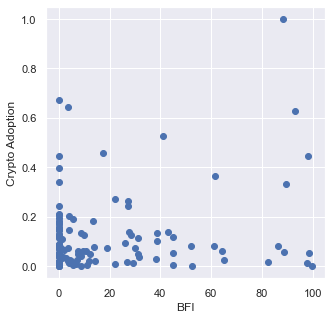

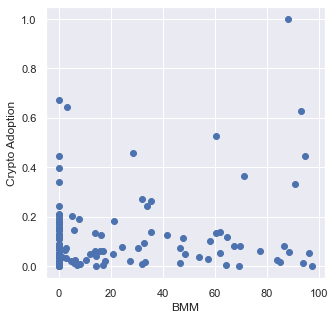

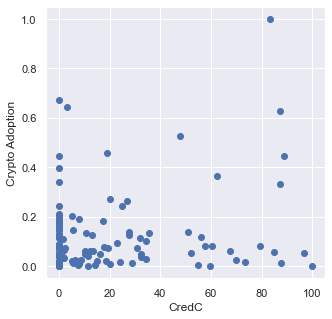

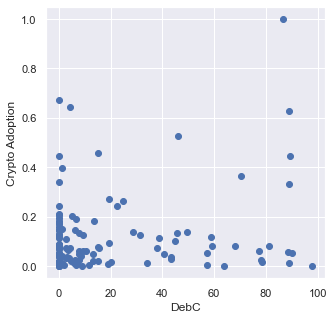

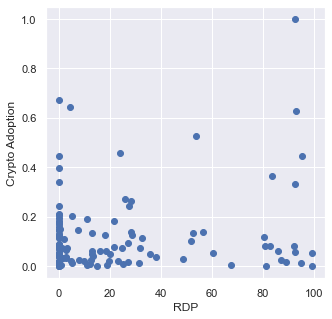

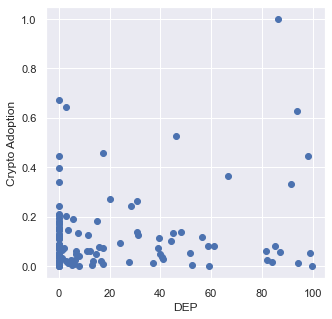

In [176]:
y=df_all_2021['C']

for n in range(11,18):
    x=df_all_2021.iloc[:,n].sort_values()
    plt.figure(figsize=(5, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(str(df_all_2021.columns[n]))
    plt.ylabel('Crypto Adoption')
    #plt.savefig("../crypto_adoption_emerging_countries/output/plots/Plot_Crypto_" + str(df_all_2021.columns[n]) + "2021.jpg")
    plt.show()

# 4. Multivariate Regression

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.179
Model:                            GLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.742
Date:                Mon, 22 Aug 2022   Prob (F-statistic):            0.00436
Time:                        11:57:09   Log-Likelihood:                 56.522
No. Observations:                 137   AIC:                            -91.04
Df Residuals:                     126   BIC:                            -58.92
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0828      0.214     -0.387      0.6

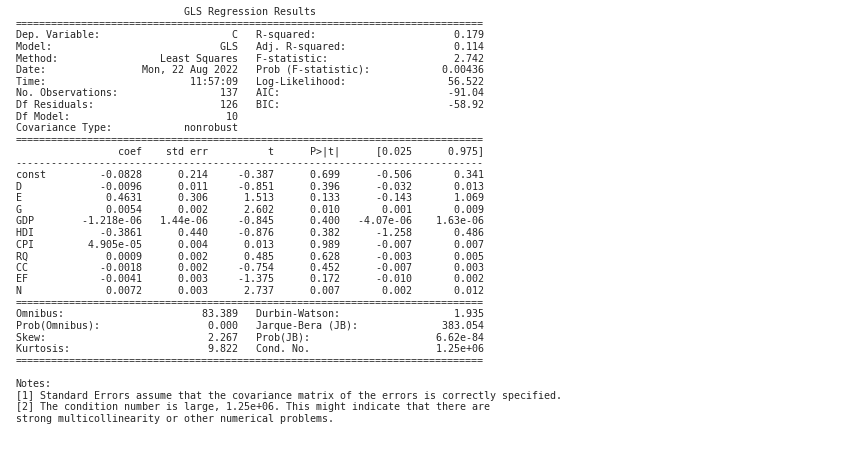

In [239]:
#Initial state as in Paper
x = df_country_all.loc[:, df_country_all.columns!='C']
y = df_country_all['C']

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_init = sm.GLS(y, x).fit()
predictions = model_init.predict(x) 
 
print_model = model_init.summary()
print(print_model)

#Save Result
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model_init.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_init.png')

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.169
Model:                            GLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.054
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0297
Time:                        11:57:10   Log-Likelihood:                 63.943
No. Observations:                 123   AIC:                            -103.9
Df Residuals:                     111   BIC:                            -70.14
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1659      0.203     -0.818      0.4

/Users/tobiaslabarta/miniforge3/envs/pm/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/tobiaslabarta/miniforge3/envs/pm/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.176
Model:                            GLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.796
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0525
Time:                        11:57:11   Log-Likelihood:                 64.484
No. Observations:                 123   AIC:                            -101.0
Df Residuals:                     109   BIC:                            -61.60
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1534      0.211     -0.727      0.4

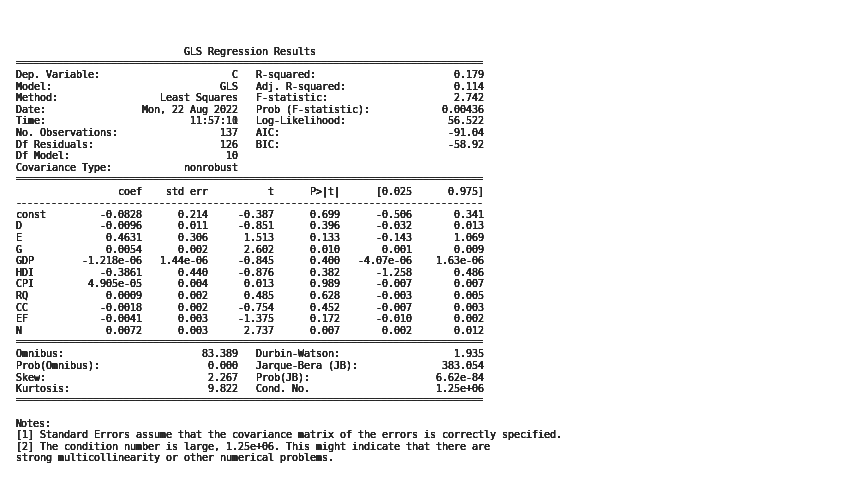

In [240]:
#Adding Financial Inclusion Indicators with each round
y = df_all_2017['C']

# with statsmodels

columncount = 1

for n in range(12,18):
    x = df_all_2017.iloc[:, 1:n]
    x = sm.add_constant(x) # adding a constant

    model_2017 = sm.GLS(y, x).fit()
    predictions = model_2017.predict(x) 

    print_model = model_2017.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_init.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2017_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.169
Model:                            GLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     2.050
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0300
Time:                        11:57:11   Log-Likelihood:                 63.925
No. Observations:                 123   AIC:                            -103.8
Df Residuals:                     111   BIC:                            -70.10
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0743      0.243      0.305      0.7

                            GLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.193
Model:                            GLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.704
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0607
Time:                        11:57:12   Log-Likelihood:                 65.721
No. Observations:                 123   AIC:                            -99.44
Df Residuals:                     107   BIC:                            -54.45
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1308      0.249      0.526      0.6

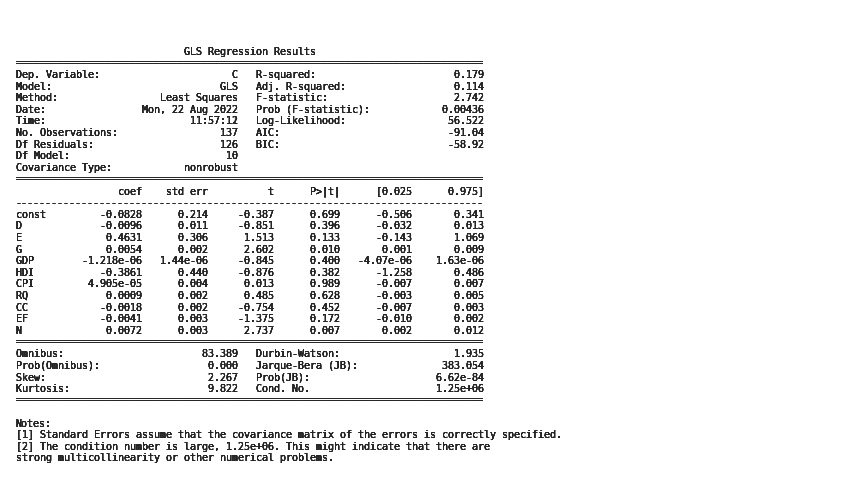

In [241]:
#Adding Financial Inclusion Indicators with each round
y = df_all_2021['C']

# with statsmodels

for n in range(12,18):
    x = df_all_2021.iloc[:, 1:n]
    x = sm.add_constant(x) # adding a constant

    model_2021 = sm.GLS(y, x).fit()
    predictions = model_2021.predict(x) 

    print_model = model_2021.summary()
    print(print_model)
    
    #Save Result
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model_init.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../crypto_adoption_emerging_countries/output/regression/model_2021_' + str(columncount) + '.png')
    
    #Increase count
    columncount = columncount + 1